### Exercise 1

In [26]:
from bidict import bidict
from datetime import datetime
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn import datasets, metrics

google = False
data_path = 'G:/My Drive/csc730'

In [27]:
# %matplotlib qt

In [28]:
if google == True:
    from google.colab import drive
    drive.mount('/content/drive')
    !ls "/content/drive/"

In [29]:
X_y = np.load('skewed_MNIST.npy')
X = X_y[:,:-1]
y = X_y[:,-1]
print(X.shape,y.shape)

(12244, 784) (12244,)


Text(0, 0.5, 'frequency')

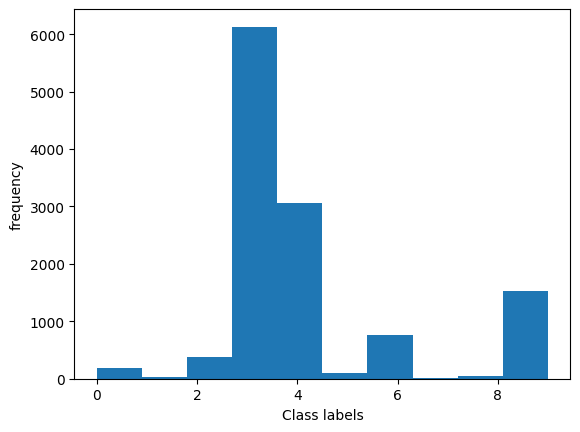

In [30]:
plt.hist(y)
plt.xlabel('Class labels')
plt.ylabel('frequency')

In [47]:
# Using only X, come up with some method to assign an "anomalousness score" to each point (from scratch)
def score_random(X):
    return np.random.rand(X.shape[0])

def score_threshold_and_count(X, threshold):
    count = np.sum(X > threshold, axis=1)
    print(count)
    print(np.mean(count))
    score = [(count[i] - np.mean(count)) for i in range(len(count))]
    
    print(score)
    return score

def score_threshold_count_and_square(X, threshold):
    count = np.sum(X > threshold, axis=1)
    print(count)
    print(np.mean(count))
    score = [(count[i] - np.mean(count)) ** 2 for i in range(len(count))]
    print(score)
    return score

def score_single_axis_gaussian(X, mean, std):
    return np.sum(np.square(X - mean) / std, axis=1)

def score_multi_axis_gaussian(X, mean, cov):
    return 0

def score_fft(X):
    return 0




In [32]:
# Using y, calculate the probabilities of each class
def get_class_probs(y):
    class_probs = np.zeros(10)
    for i in range(10):
        class_probs[i] = np.sum(y==i)/len(y)
    return class_probs

In [73]:
# Assuming the "correct" answer would be to have the anomalousness ranking match the ordering of the 
# class probability, calculate the accuracy of your method
def get_accuracy(true_labels, sorted_labels):
        
    return  np.sum(true_labels == sorted_labels) / len(sorted_labels)

scores = {'random':{}, 'threshold_and_count':{}, 'threshold_count_and_square':{}, 'single_axis_gaussian':{}, 'multi_axis_gaussian':{}, 'fft':{}}
for key in scores.keys():
    scores[key]['scores'] =[]
    scores[key]['true_labels'] = []
    scores[key]['sorted'] = []
    scores[key]['sorted_labels'] = []
    scores[key]['accuracy'] = 0

scores['random']['scores'] = score_random(X)
scores['threshold_and_count']['scores'] = score_threshold_and_count(X, 128)
scores['threshold_count_and_square']['scores'] = score_threshold_count_and_square(X, 128)
scores['single_axis_gaussian']['scores'] = score_single_axis_gaussian(X, np.mean(X, axis=0), np.std(X, axis=0))
scores['multi_axis_gaussian']['scores'] = score_multi_axis_gaussian(X, np.mean(X, axis=0), np.cov(X, rowvar=False))
scores['fft']['scores'] = score_fft(X)

scores['random']['true_labels'] = y
scores['threshold_and_count']['true_labels'] = y
scores['threshold_count_and_square']['true_labels'] = y
scores['single_axis_gaussian']['true_labels'] = y
scores['multi_axis_gaussian']['true_labels'] = y
scores['fft']['true_labels'] = y

#keeping scores and labels together, sort by score
for key in scores.keys():
    scores[key]['sort_index'] = np.argsort(scores[key]['scores'])
    if(scores[key]['sort_index'].shape[0] != scores[key]['true_labels'].shape[0]):
        print(f'ERROR:{key} sort index and true labels are not the same length')
    else:        
        scores[key]['sorted_scores'] = [scores[key]['scores'][scores[key]['sort_index'][i]] for i in range(len(scores[key]['sort_index']))]        
        scores[key]['sorted_labels'] = [scores[key]['true_labels'][scores[key]['sort_index'][i]] for i in range(len(scores[key]['sort_index']))]
        

#calculate accuracy
for key in scores.keys():
    #check for proper length
    if(len(scores[key]['true_labels']) != len(scores[key]['sorted_labels'])):
        print(f'ERROR:{key} true labels and sorted labels are not the same length')
    else:
        scores[key]['accuracy'] = get_accuracy(scores[key]['true_labels'], scores[key]['sorted_labels'])
        print(key, scores[key]['accuracy'])
    


[ 88 127  85 ...  85  92 117]
105.24648807579223
[-17.24648807579223, 21.75351192420777, -20.24648807579223, 7.753511924207771, -35.24648807579223, -6.246488075792229, 2.7535119242077712, -29.24648807579223, 19.75351192420777, -27.24648807579223, -20.24648807579223, -45.24648807579223, -32.24648807579223, -54.24648807579223, -51.24648807579223, -39.24648807579223, 10.753511924207771, -18.24648807579223, -70.24648807579223, -62.24648807579223, -23.24648807579223, -51.24648807579223, -67.24648807579223, -7.246488075792229, -36.24648807579223, -42.24648807579223, -53.24648807579223, -50.24648807579223, -58.24648807579223, -55.24648807579223, -39.24648807579223, -48.24648807579223, -45.24648807579223, -37.24648807579223, -14.246488075792229, -39.24648807579223, -39.24648807579223, 18.75351192420777, -2.2464880757922288, -0.24648807579222876, 41.75351192420777, -10.246488075792229, 8.753511924207771, -1.2464880757922288, 3.7535119242077712, 2.7535119242077712, 25.75351192420777, -33.2464880

C:\Users\krisr\AppData\Local\Temp\ipykernel_25784\2638229258.py:23: RuntimeWarning: invalid value encountered in divide
  return np.sum(np.square(X - mean) / std, axis=1)


ERROR:multi_axis_gaussian sort index and true labels are not the same length
ERROR:fft sort index and true labels are not the same length
random 0.33444952629859526
threshold_and_count 0.39268213002286834
threshold_count_and_square 0.3276706958510291
single_axis_gaussian 0.001633453119895459
ERROR:multi_axis_gaussian true labels and sorted labels are not the same length
ERROR:fft true labels and sorted labels are not the same length


In [65]:


sorted_indices = np.argsort(scores['threshold_count_and_square']['scores'])
print(sorted_indices)

#now that we have the sorted index, we need to apply this to the 'scores' and 'labels' into a new array
sorted_scores = [scores['threshold_count_and_square']['scores'][sorted_indices[i]] for i in range(len(sorted_indices))]
sorted_labels = [scores['threshold_count_and_square']['true_labels'][sorted_indices[i]] for i in range(len(sorted_indices))]

print(sorted_scores)
print(sorted_labels)


[8663  669  657 ...  218  321  568]
[0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.06075637150775551, 0.0607563715077555

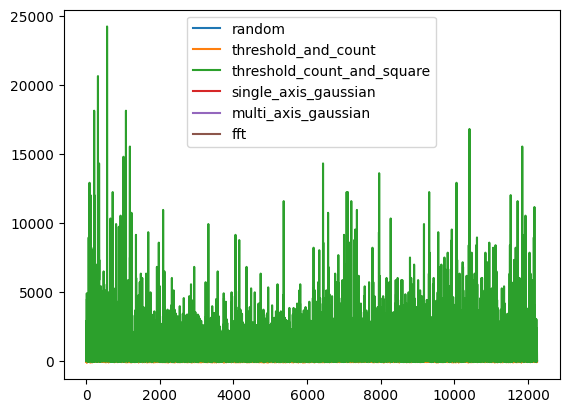

In [35]:
plt.plot(scores['random']['scores'], label='random')
plt.plot(scores['threshold_and_count']['scores'], label='threshold_and_count')
plt.plot(scores['threshold_count_and_square']['scores'], label='threshold_count_and_square')
plt.plot(scores['single_axis_gaussian']['scores'], label='single_axis_gaussian')
plt.plot(scores['multi_axis_gaussian']['scores'], label='multi_axis_gaussian')
plt.plot(scores['fft']['scores'], label='fft')
plt.legend()
plt.show()
